## Mini Project III


In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_cust = pd.read_csv('twm_customer.csv', sep=';')

In [18]:
print(df_cust.shape)
df_cust.head()

(747, 15)


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [19]:
# remove names, street name from dataframe
df = df_cust.drop(columns=['first_name', 'last_name', 'street_nbr', 'street_name', 'name_prefix', 'cust_id'])

In [20]:
df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,26150,46,5,1,M,2,89194,Las Vegas,NV
1,6605,71,1,0,M,2,90159,Los Angeles,CA
2,18548,38,8,0,F,1,90024,Los Angeles,CA
3,47668,54,3,0,F,1,90172,Los Angeles,CA
4,44554,59,9,2,F,4,10138,New York City,NY


In [21]:
# create dummy variables for gender and remove gender column
df = pd.concat([df, pd.get_dummies(df['gender'])], axis=1)


In [22]:
print(df.shape)
df.head()

(747, 11)


,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,F,M
0,26150,46,5,1,M,2,89194,Las Vegas,NV,0,1
1,6605,71,1,0,M,2,90159,Los Angeles,CA,0,1
2,18548,38,8,0,F,1,90024,Los Angeles,CA,1,0
3,47668,54,3,0,F,1,90172,Los Angeles,CA,1,0
4,44554,59,9,2,F,4,10138,New York City,NY,1,0


In [23]:
# check if there is any missing data
df.isna().sum()

income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
postal_code        0
city_name          0
state_code         0
F                  0
M                  0
dtype: int64

In [24]:
# add age bins by decade

df['age_bin_category'] = pd.cut(x=df['age'], bins=[10, 29, 59, 89], labels=['young', 'middle aged','senior'])

In [25]:
df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,F,M,age_bin_category
0,26150,46,5,1,M,2,89194,Las Vegas,NV,0,1,middle aged
1,6605,71,1,0,M,2,90159,Los Angeles,CA,0,1,senior
2,18548,38,8,0,F,1,90024,Los Angeles,CA,1,0,middle aged
3,47668,54,3,0,F,1,90172,Los Angeles,CA,1,0,middle aged
4,44554,59,9,2,F,4,10138,New York City,NY,1,0,middle aged


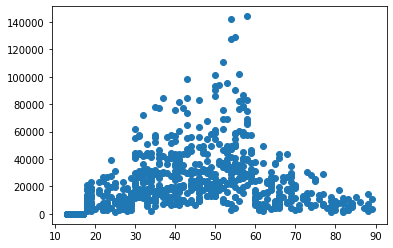

In [26]:
plt.scatter(x=df['age'],y=df['income'])

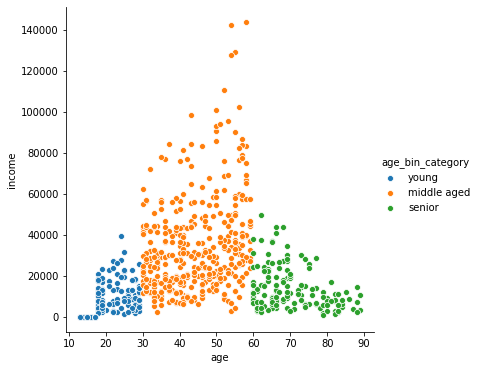

In [27]:
sns.pairplot(x_vars=["age"], y_vars=["income"], data=df, hue='age_bin_category', height=5)

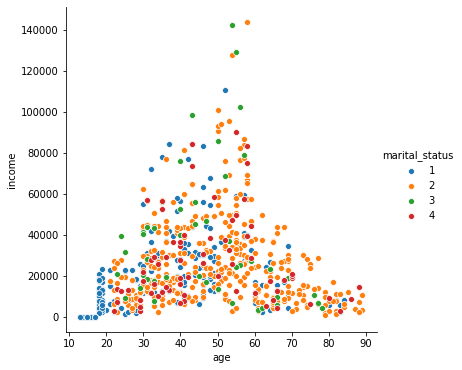

In [15]:
sns.pairplot(x_vars=["age"], y_vars=["income"], data=df, hue='marital_status', height=5)

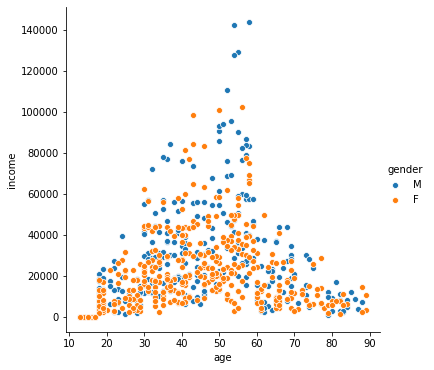

In [28]:
sns.pairplot(x_vars=["age"], y_vars=["income"], data=df, hue='gender', height=5)

### Try k-means cluster on age

In [35]:
# remove categorical data from df

df_X = df.drop(['gender','state_code', 'city_name', 'postal_code', 'age_bin_category'], axis=1)

# import Kmeans from sklearn
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [39]:
X = df_X.to_numpy()

# fit and predict
y_km = km.fit_predict(X)

In [40]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

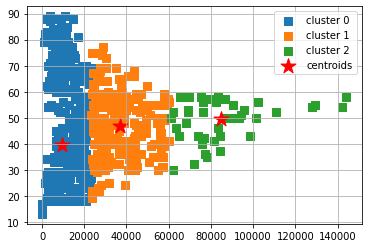

In [41]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

In [42]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

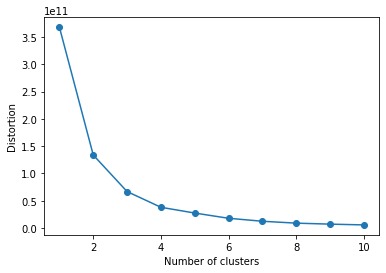

In [43]:
# elbow rule
plot_distortion(X,max_clusters=10)

### looks like 2-4 clusters is optimal

In [94]:
# try DBSCAN to see clusters

# import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(df_X)

eps=1.7
min_samples=15

# create instance of DBSCAN class from sklearn library
db = DBSCAN(eps=eps,
            min_samples=min_samples,
            metric='euclidean')

# fit and predicr
y_db = db.fit_predict(X_std)

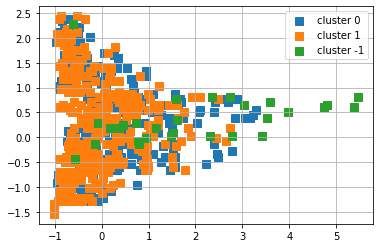

In [95]:
# Plot DBSCAN clusters
plot_clusters(X_std,y_db)

In [91]:
df_X.head()

,income,age,years_with_bank,nbr_children,marital_status,F,M
0,26150,46,5,1,2,0,1
1,6605,71,1,0,2,0,1
2,18548,38,8,0,1,1,0
3,47668,54,3,0,1,1,0
4,44554,59,9,2,4,1,0


## Getting account information

In [189]:
import datetime

dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')

df_acct = pd.read_csv('twm_accounts.csv', sep=';',parse_dates=['acct_start_date'], date_parser=dateparse)
print(df_acct.shape)
df_acct.head()

(1409, 8)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,1995-12-10,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,1993-03-15,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,1992-03-18,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,1995-07-06,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,1994-06-17,NaN,849.37,462.28


In [191]:
df_acct=df_acct[['acct_nbr','cust_id']]

In [190]:
df_trans = pd.read_csv('twm_transactions.csv', sep=';',parse_dates=['tran_date'], date_parser=dateparse)
print(df_trans.shape)
df_trans.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(77580, 10)


,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,204521,B,IQ


In [200]:
import datetime

dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')

df_act = pd.read_csv('twm_accounts.csv', sep=';',parse_dates=['acct_start_date'], date_parser=dateparse)
df_trans = pd.read_csv('twm_transactions.csv', sep=';',parse_dates=['tran_date'], date_parser=dateparse)
df_act=df_act[['acct_nbr','cust_id']]

df_all = pd.merge(df_trans, df_acct, how='left',on='acct_nbr')
df_sum = df_all.groupby(['cust_id'],as_index=False).agg({'tran_amt':"sum",'tran_id':'count'})
df_sum['avg_amt'] = df_sum['tran_amt']/df_sum['tran_id']


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
df_sum = df_all.groupby(['cust_id'],as_index=False).agg({'tran_amt':"sum",'tran_id':'count'})
df_sum['avg_amt'] = df_sum['tran_amt']/df_sum['tran_id']
df_sum

,cust_id,tran_amt,tran_id,avg_amt
0,1362480.0,2185.99,157,13.923503
1,1362484.0,335.39,187,1.793529
2,1362485.0,-925.52,171,-5.412398
3,1362486.0,-1108.36,50,-22.167200
4,1362487.0,-3553.12,103,-34.496311
...,...,...,...,...
659,1363490.0,34.24,12,2.853333
660,1363491.0,-187.63,18,-10.423889
661,1363492.0,-2857.53,153,-18.676667
662,1363493.0,-3847.51,118,-32.606017


In [180]:
df_acct = pd.concat([df_acct, pd.get_dummies(df_acct['acct_type'])], axis=1)

In [181]:
df_acct.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,CC,CK,SV
0,13628063,1362806,SV,Y,1995-12-10,NaN,1430.22,284.58,0,0,1
1,4561143213627090,1362709,CC,Y,1993-03-15,NaN,266.34,496.15,1,0,0
2,4561143213628360,1362836,CC,Y,1992-03-18,NaN,55.90,1000.00,1,0,0
3,13633112,1363311,CK,Y,1995-07-06,NaN,11017.13,968.46,0,1,0
4,4561143213633610,1363361,CC,Y,1994-06-17,NaN,849.37,462.28,1,0,0


In [184]:
account_bal = df_acct.groupby(['cust_id']).agg({'CC  ':'sum','CK  ':'sum','SV  ':'sum'}).reset_index()

In [185]:
account_bal

,cust_id,CC,CK,SV
0,1362480,1,1,1
1,1362484,1,1,1
2,1362485,1,1,0
3,1362486,0,1,1
4,1362487,1,1,1
...,...,...,...,...
660,1363490,0,0,1
661,1363491,0,0,1
662,1363492,1,1,1
663,1363493,1,1,1


In [174]:
df_has_sav = []
for i in range(df_account_bal.shape[0]):
    if df_account_bal['SV  '][i].isna()==True:
        df_has_sav.append(0)
    else:
        df_has_sav.append(1)
        

df_has_sav

AttributeError: 'numpy.float64' object has no attribute 'isna'

In [15]:
#create scaled matrix
X = StandardScaler().fit_transform(df) # scaling
df = pd.DataFrame(X, columns = df.columns) # put back in dataframe

In [16]:
# check eigenvalues to see how many are greater than 1

arr = df.to_numpy()
arr_T = np.transpose(arr)

AAt = arr.dot(arr_T)
AtA = arr_T.dot(arr)

eigval_AtA, v_AtA = np.linalg.eig(AtA)
eigval_AAt, v_AAt = np.linalg.eig(AAt)

print("number of eigen values > 1 in AtA:",sum(i > 1 for i in eigval_AtA), "out of", len(eigval_AtA))
print("number of eigen values > 1 in AAt:",sum(i > 1 for i in eigval_AAt), "out of", len(eigval_AAt))

number of eigen values > 1 in AtA: 8 out of 8
number of eigen values > 1 in AAt: 8 out of 747


In [17]:
# start PCA process

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca_2d = PCA().fit_transform(df)

In [18]:
# look at explained variance between principal components

PCA().fit(df).explained_variance_ratio_

array([0.22672316, 0.18271141, 0.14852672, 0.13161226, 0.106171  ,
       0.09092518, 0.0687668 , 0.04456347])

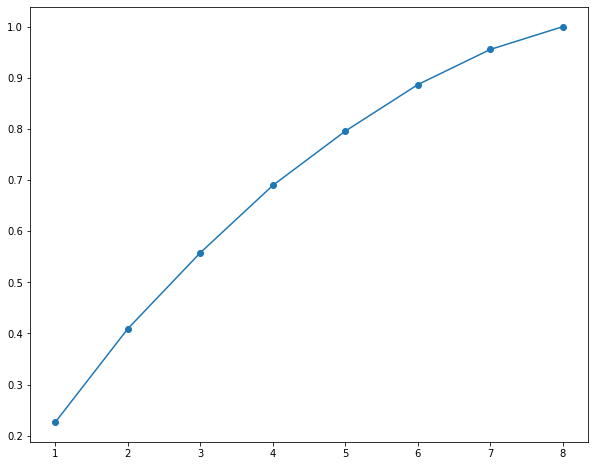

In [1280]:
# look at cumulative explained variance to establish number of principal components to select

plt.figure(figsize=(10,8))
plt.plot(range(1,9),PCA().fit(df).explained_variance_ratio_.cumsum(), marker = 'o')

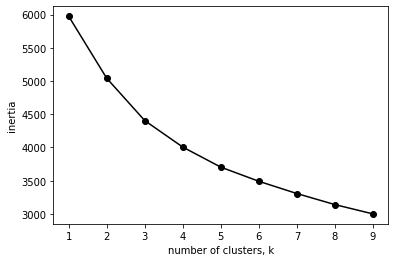

In [1281]:
# look at kmeans elbow plot to see if there is obvious number of clusters

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_2d)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [1282]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=123)
y_km = kmeans.fit_predict(df)

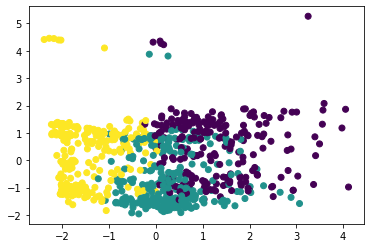

In [1283]:
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()

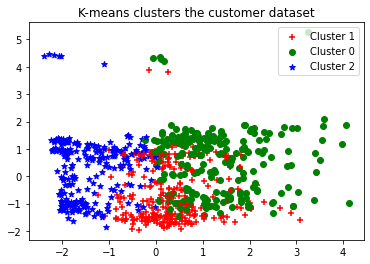

In [1284]:
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
pl.title('K-means clusters the customer dataset')
pl.show()

In [1285]:
df_pca = pd.DataFrame(pca_2d)
df_pca['y_km']=y_km

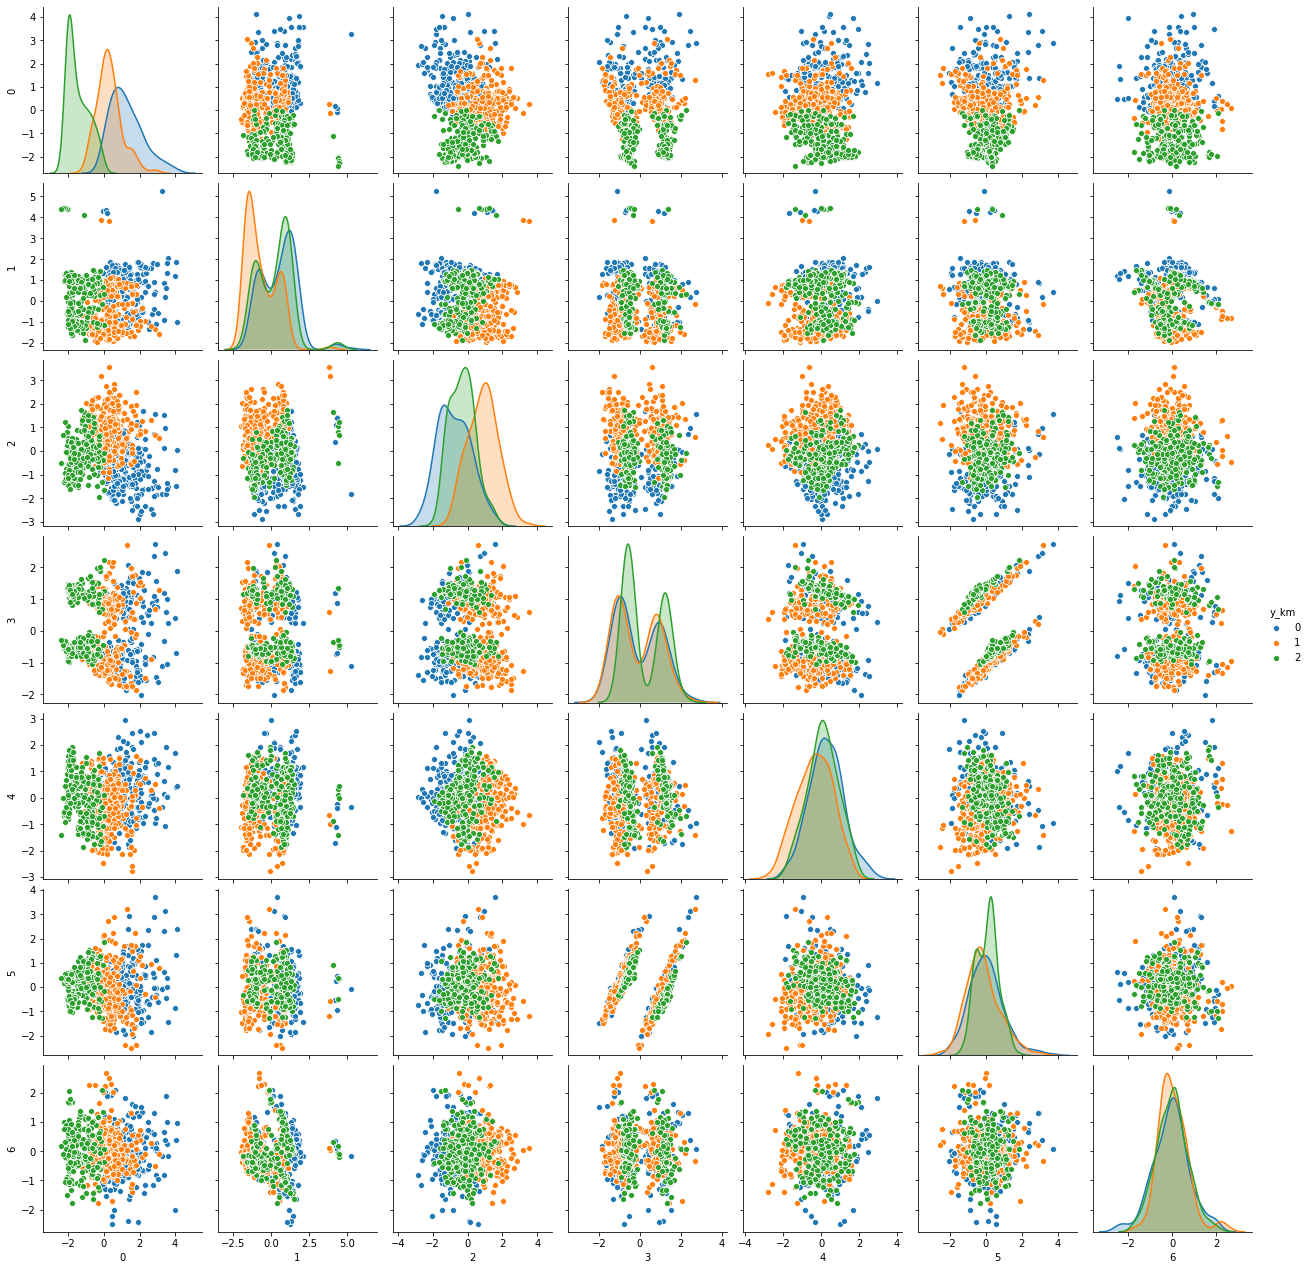

In [897]:
sns.pairplot(df_pca,hue='y_km')

In [1287]:
# add kmeans data back into dataframe

df['segment_kmeans_pca'] = kmeans.labels_
df['segment']=df['segment_kmeans_pca'].map({0:'first',1:'second',2:'third'})
df.head()

,income,age,years_with_bank,nbr_children,marital_status,M,Lat,Long,segment_kmeans_pca,segment
0,0.154185,0.184312,0.408539,0.258591,0.132149,1.127172,-0.185145,-0.924589,0,first
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149,1.127172,-0.610743,-1.088833,1,second
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614,-0.887176,-0.610743,-1.088833,2,third
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614,-0.887176,-0.610743,-1.088833,1,second
4,0.983479,0.864867,1.904514,1.165479,2.375675,-0.887176,0.727834,1.252063,0,first
